# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the second project of the [__Deep Reinforcement Learning Nanodegree program__](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893). 

Follow the instructions below to get started!

### 1. Start the Environment
We begin by importing some necessary packages.

In [1]:
from unityagents import UnityEnvironment
from collections import namedtuple, deque
import os
import numpy as np
import random
import torch

import matplotlib.pyplot as plt
%matplotlib inline

# check for GPU
print("CUDA is available:", torch.cuda.is_available())

CUDA is available: True


Next, we will start the environment! *__Before running the code cell below__*, change the file_name parameter to match the location of the Unity environment that you downloaded.

- __Mac:__ "path/to/Tennis.app"
- __Windows (x86):__ "path/to/Tennis_Windows_x86/Tennis.exe"
- __Windows (x86_64):__ "path/to/Tennis_Windows_x86_64/Tennis.exe"
- __Linux (x86):__ "path/to/Tennis_Linux/Tennis.x86"
- __Linux (x86_64):__ "path/to/Tennis_Linux/Tennis.x86_64"

For instance, if you are using a Mac, then you downloaded Reacher.app. If this file is in the same folder as the notebook, then the line below should appear as follows:

    env = UnityEnvironment(file_name="Tennis.app")

In [2]:
env = UnityEnvironment(file_name=r"C:\Users\bukal\Udacity\4. Multi-Agent Reinforcement Learning\Collaboration and Competition\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677


### 4. Train the Agent with MADDPG

Run the code cell below to train the agent from scratch. Alternatively, you can skip to the next code cell (**5. Watch a Smart Agent!**) to load the pre-trained weights from file and watch the agents!

When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:

```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from MADDPG import MultiAgent

# instantiate the Agents
agents = MultiAgent(state_size=state_size, action_size=action_size, num_agents=num_agents)

Episode 100	Average score: 0.01
Episode 200	Average score: 0.00
Episode 300	Average score: 0.02
Episode 400	Average score: 0.02
Episode 500	Average score: 0.03
Episode 600	Average score: 0.05
Episode 700	Average score: 0.05
Episode 800	Average score: 0.08
Episode 900	Average score: 0.11
Episode 1000	Average score: 0.11
Episode 1100	Average score: 0.16
Episode 1200	Average score: 0.25
Episode 1300	Average score: 0.42
Episode 1378	Average Score: 0.50
Environment solved in 1378 episodes!	Average Score: 0.50


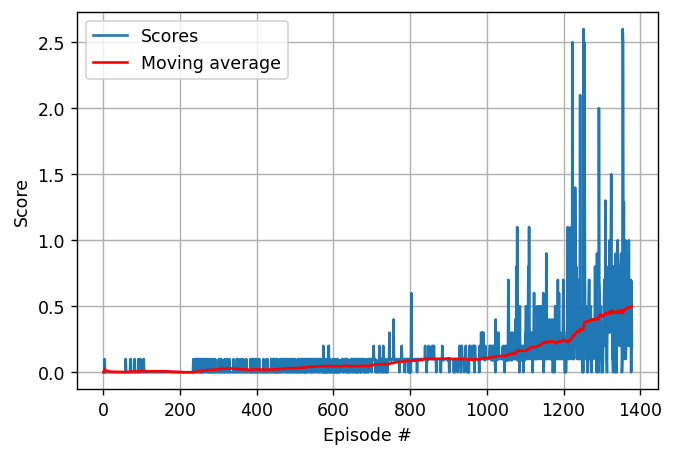

In [7]:
def MADDPG_algorithm(n_episodes=5000):
    """Multi-Agent Deep Deterministic Policy Gradient for N agents
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
    """
    scores_deque = deque(maxlen=100)                                    # last 100 scores  
    scores = []                                                         # list containing scores from each episode
    moving_average = []
    for i_episode in range(1, n_episodes+1):                                    
        env_info = env.reset(train_mode=True)[brain_name]               # reset the environment     
        states = env_info.vector_observations                           # get the current state (for each agent)               
        score = np.zeros(num_agents)                                    # initialize the score (for each agent)
        agents.reset()
        while True:
            actions = agents.act(states)                                # select action (for each agent) 
                                                                        # w.r.t the current policy and exploration
            env_info = env.step(actions)[brain_name]                    # send all action to the environment            
            next_states = env_info.vector_observations                  # get the next state (for each agent)
            rewards = env_info.rewards                                  # get the reward (for each agent)         
            dones = env_info.local_done                                 # see if episode has finished
            agents.step(states, actions, rewards, next_states, dones)   # store the experience and learn (for each agent)              
            states = next_states                                        # roll over states to next time step
            score += rewards                                            # update the score (for each agent)  
            if any(dones):                                 
                break                                                   # exit loop if episode finished
        max_score = np.max(score)
        scores_deque.append(max_score)
        scores.append(max_score)
        average_score = np.mean(scores_deque)
        moving_average.append(average_score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score), end="")  
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage score: {:.2f}'.format(i_episode , average_score))
        if average_score >= 0.5:
            agents.save_model()
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, average_score))
            break
    return scores, moving_average

scores, mov_avgs = MADDPG_algorithm()

# plot the scores
fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label = 'Scores')
plt.plot(np.arange(1, len(mov_avgs)+1), mov_avgs, c = 'r', label = 'Moving average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

### 5. Watch a Smart Agent!

In [8]:
from MADDPG import MultiAgent

# instantiate the Agents
agents = MultiAgent(state_size=state_size, action_size=action_size, num_agents=num_agents)

# load the model's parameters of each agent
agents.load_model()

for i_episode in range(3):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agents.act(states, add_noise=False)      # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents): {:.2f}'.format(np.mean(scores)))

Total score (averaged over agents): 2.60
Total score (averaged over agents): 2.65
Total score (averaged over agents): 2.60


When finished, you can close the environment.

In [9]:
env.close()